<a href="https://colab.research.google.com/github/andreavazquezt/ProyectoIntegrador/blob/main/Avance3_Equipo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

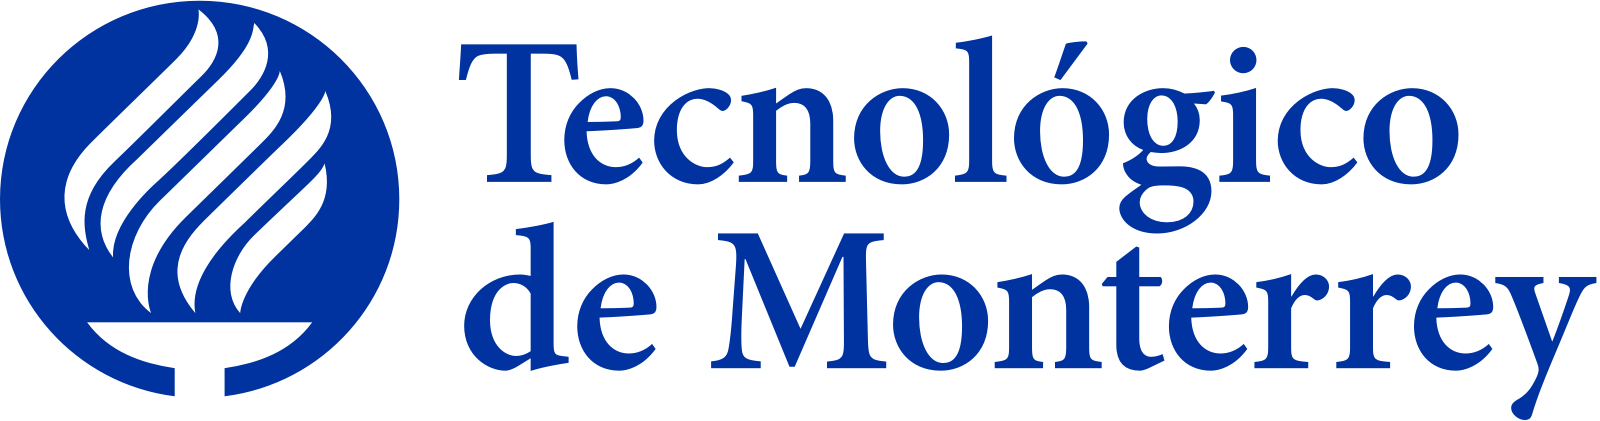

**Andrea Vazquez Tadeo A01730613**

**Hector Manuel Gonzalez Villareal A00178679**

**Karina Zafra Vallejo A01793979**

# Avance 2

## Construcción

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats as sts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Leemos el dataset:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/world_population.csv")

Localizamos los valores faltantes del dataset para poder ajustarlos y no tener ningun tipo de error para el entrenamiento y prueba de los modelos:

In [ ]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [ ]:
df.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

Utilizamos el método de interpolación lineal para interpolar los valores faltantes del dataset debido a que es una técnica comúnmente utilizada y de facil implementacion para estimar valores intermedios dentro de un conjunto de datos. La justificación detrás de este método radica en la suposición de que los datos tienen un comportamiento lineal entre puntos conocidos.

In [ ]:
dforiginal = df.interpolate(method ='linear', limit_direction ='forward')
dforiginal.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


Comprobamos que no hay valores faltantes dentro de nuestro dataset y asi poder continuar con el entrenamiento del dataset:

In [ ]:
dforiginal.isnull()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Separamos el dataset en **entrenamiento** y **prueba** dataframes para asi poder entrenar nuestro modelo (al tomar valores del conjunto de entrenamiento) y probarlo (comparando las  predicciones del modelo con los valores del conjunto de prueba), utilizando las primeras 180 filas para el entrenamiento y las filas restantes para prueba:

In [ ]:
dforiginal = dforiginal.sample(frac=1, random_state=2)
train_df = dforiginal[:180]
train_df = train_df.reset_index(drop=True)
test_df = dforiginal[180:]
test_df = test_df.reset_index(drop=True)

train_df.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,177,BLZ,Belize,Belmopan,North America,405272,394921,359871,322106,240406,182589,145133,120905,22966,17.6466,1.0131,0.01
1,150,MKD,North Macedonia,Skopje,Europe,2093599,2111072,2107962,2093828,2037936,2044174,1907023,1656783,25713,81.4218,0.9954,0.03
2,108,BGR,Bulgaria,Sofia,Europe,6781953,6979175,7309253,7592273,8097691,8767778,8980606,8582950,110879,61.1654,0.9849,0.09
3,16,VNM,Vietnam,Hanoi,Asia,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,1.0074,1.23
4,84,DOM,Dominican Republic,Santo Domingo,North America,11228821,10999664,10405832,9775755,8540791,7129004,5755800,4475871,48671,230.7087,1.0100,0.14


Visualizamos el dataframe para la prueba:

In [ ]:
test_df.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,185,NCL,New Caledonia,Nouméa,Oceania,289950,286403,283032,261426,221537,177264,148599,110982,18575,15.6097,1.0075,0.00
1,105,SRB,Serbia,Belgrade,Europe,7221365,7358005,7519496,7653748,7935022,7987529,7777010,7193533,88361,81.7257,0.9897,0.09
2,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
3,199,VCT,Saint Vincent and the Grenadines,Kingstown,North America,103948,104632,106482,109308,113813,112487,107480,98459,389,267.2185,0.9963,0.00
4,169,MNE,Montenegro,Podgorica,Europe,627082,629048,633966,631044,633324,621442,589324,530268,13812,45.4012,0.9988,0.01


Obtendremos la cantidad de los valores de salida para **entrenamiento** y **prueba** de la columna que el modelo pretende predecir **Growth Rate**:




In [ ]:
y_train = train_df['Growth Rate'].to_numpy()
y_test = test_df['Growth Rate'].to_numpy()

y_train.shape, y_test.shape

((180,), (54,))

### Modelo Baseline

Obtenemos el error del modelo baseline que utiliza el promedio de Growth Rate en el dataframe de **entrenamiento**:

In [ ]:
average_GrowthRate = train_df['Growth Rate'].mean()
baseline_model_test_predictions = [average_GrowthRate] * len(test_df)

mean_absolute_error(baseline_model_test_predictions, y_test)

0.011223641975308639

De manera general lo que realiza este modelo es calcular el promedio de todos los valores de **Growth Rate** dentro del dataframe de entrenamiento, lo cual nos servira para evaluar los modelos adicionales basados en el promedio del error absoluto.

Como podemos visualizar, obtuvimos un error de 0 y lo podemos comprobar al obtener el promedio para **Growth Rate** y compararlo con el primer valor dentro del dataframe de prueba el cual es de 1.0075 para Oceania.

In [ ]:
train_df['Growth Rate'].mean()

1.0097383333333334

### Binning

Generamos el histograma para la columna World Population Percentage del dataframe de **entrenamiento**:

<Axes: >

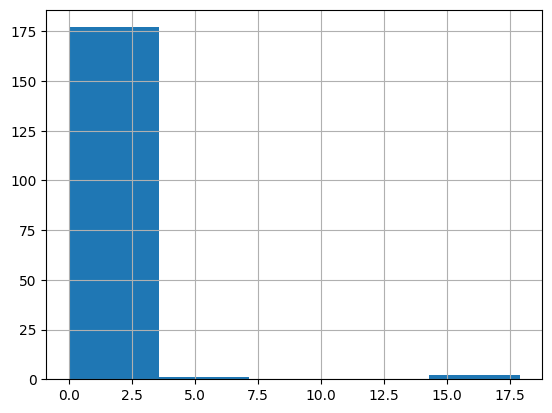

In [ ]:
train_df['World Population Percentage'].hist(bins=5)

Como visualizamos el valor con la frecuencia mas alta para la caracteristica (175) es del 0 al 2.5% de la poblacion mundial.

### Generación de nuevas características

Con lo anterior podremos ser capaces de dividir los datos en dos bins o de acuerdo a las necesidades del modelo. Para este ejemplo agregaremos una nueva caracteristica al DataFrame de entrenamiento en donde el World Population Percentage sea inferior a 1.5 con valores binarios para indicar si es inferior a 1.5 con 1 y si es mayor al valor obtendremos un 0. Este ejemplo es simulando un escenario en el que los paises con un porcentaje de poblacion mundial superior al 1.5% son irrelevantes para el modelo.

In [ ]:
(train_df['World Population Percentage']<1.5)

0      True
1      True
2      True
3      True
4      True
       ... 
175    True
176    True
177    True
178    True
179    True
Name: World Population Percentage, Length: 180, dtype: bool

Como podemos visualizar, el valor entregado es de tipo boolean, pero para efectos de nuestro modelos lo convertiremos a tipo integer con el objetivo de hacer mas eficiente nuestro dataframe.

In [ ]:
train_df['World Population Percentage less than 1.5'] = (train_df['World Population Percentage']<1.5).astype(int)
train_df.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,World Population Percentage less than 1.5
0,177,BLZ,Belize,Belmopan,North America,405272,394921,359871,322106,240406,182589,145133,120905,22966,17.6466,1.0131,0.01,1
1,150,MKD,North Macedonia,Skopje,Europe,2093599,2111072,2107962,2093828,2037936,2044174,1907023,1656783,25713,81.4218,0.9954,0.03,1
2,108,BGR,Bulgaria,Sofia,Europe,6781953,6979175,7309253,7592273,8097691,8767778,8980606,8582950,110879,61.1654,0.9849,0.09,1
3,16,VNM,Vietnam,Hanoi,Asia,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,1.0074,1.23,1
4,84,DOM,Dominican Republic,Santo Domingo,North America,11228821,10999664,10405832,9775755,8540791,7129004,5755800,4475871,48671,230.7087,1.0100,0.14,1


La generación de nuevas características es muy importante dentro de la fase de ingenieria de características debido a que nos permite utilizar modelos menos
complejos que son más rapidos de correr y más sencillos de comprender asi como de mantener. Es por esto que la generacion de caracteristicas se realiza en funcion de las necesidades del modelo.

Ahora generaremos el histograma para la columna de Densidad dentro del dataframe de entrenamiento, para asi poder agrupar los datos segun las necesidades de nuestro modelo:

<Axes: >

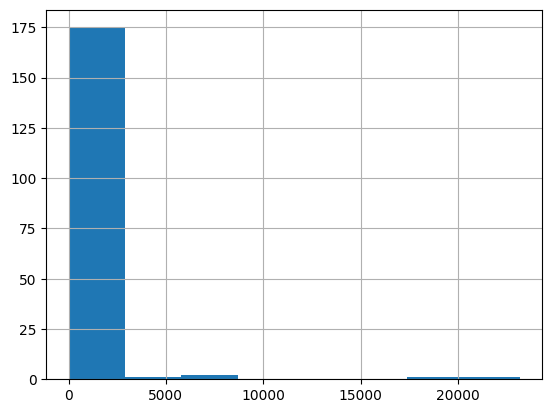

In [ ]:
train_df['Density (per km²)'].hist(bins=8)

Para la generacion de la siguiente caracteristica utilizamos el criterio de interes para los paises que cuenten con un valor superior a 500 de densidad. Entregando asi un valor 0 para todos aquellos que no cumplan con el criterio de interes.

In [ ]:
train_df['Density greater than 400'] = (train_df['Density (per km²)']>500).astype(int)
train_df.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,World Population Percentage less than 1.5,Density greater than 400
0,177,BLZ,Belize,Belmopan,North America,405272,394921,359871,322106,240406,182589,145133,120905,22966,17.6466,1.0131,0.01,1,0
1,150,MKD,North Macedonia,Skopje,Europe,2093599,2111072,2107962,2093828,2037936,2044174,1907023,1656783,25713,81.4218,0.9954,0.03,1,0
2,108,BGR,Bulgaria,Sofia,Europe,6781953,6979175,7309253,7592273,8097691,8767778,8980606,8582950,110879,61.1654,0.9849,0.09,1,0
3,16,VNM,Vietnam,Hanoi,Asia,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,1.0074,1.23,1,0
4,84,DOM,Dominican Republic,Santo Domingo,North America,11228821,10999664,10405832,9775755,8540791,7129004,5755800,4475871,48671,230.7087,1.0100,0.14,1,0


#### Desarrollo de modelo utilizando la nueva caracteristica

A continuación realizaremos la nueva configuración para el modelo solo utilizando la caracteristica (**World Population Percentage less than 1.5**) que generamos:

Ajustamos el dataframe de **entrenamiento** para la nueva variable:

In [ ]:
X_train_WorldPopulationPercentage= train_df['World Population Percentage less than 1.5'].to_numpy().reshape(-1, 1)
X_train_WorldPopulationPercentage.shape

(180, 1)

Ajustamos el dataframe de **prueba** para la nueva variable:

In [ ]:
test_df['World Population Percentage less than 1.5'] = (test_df['World Population Percentage'] < 1.5).astype(int)
X_test_WorldPopulationPercentage = test_df['World Population Percentage less than 1.5'].to_numpy().reshape(-1, 1)
X_test_WorldPopulationPercentage.shape

(54, 1)

Obtenemos el error del modelo lineal que solo utiliza la **variable binaria generada**:

In [ ]:
linear_WorldPopulationPercentage = LinearRegression().fit(X_train_WorldPopulationPercentage, y_train)
linear_WorldPopulationPercentage_test_predictions = linear_WorldPopulationPercentage.predict(X_test_WorldPopulationPercentage)
mean_absolute_error(y_test, linear_WorldPopulationPercentage_test_predictions)

0.011227603485838773

## Normalización

Obtenemos y limpiamos los datos, para este ejemplo usaremos la columna 2010 population

In [ ]:

df = dforiginal[['2010 Population']]
df=df.interpolate(method ='linear', limit_direction ='forward')
fd=df.dropna()
df.isnull()

,2010 Population
20,False
152,False
30,False
228,False
54,False
...,...
43,False
22,False
72,False
15,False


### Escalamiento



Normalizamos los datos para que tengamos todas las variables con las mismas dimensiones, en este caso usamos una transformacion de normalizacion, pero pudimos haber utilizado un min max o alguna otra.

In [ ]:
datos_normalizados = preprocessing.Normalizer().transform(df.T)
datos_normalizados = datos_normalizados.T
datos2 = pd.DataFrame(datos_normalizados, columns=["2010 Population"])

Graficamos los datos originales y nos damos cuenta que tienes un sesgo altamente positivo

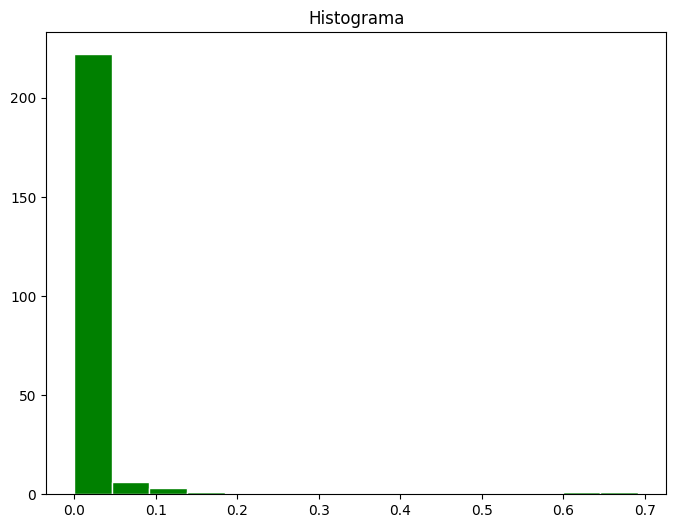

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
ax=plt.hist(datos2['2010 Population'],bins=15,color='g',edgecolor='w')
plt.title('Histograma')
plt.show()

### Transformaciones

Hacemos 4 transformaciones,una de raiz cuadrada, otra exponencial, una logaritmica y otra reciproca. dentro de estas 4 la unica que tiene un buen resultado al normalizar los datos es la logaritimica

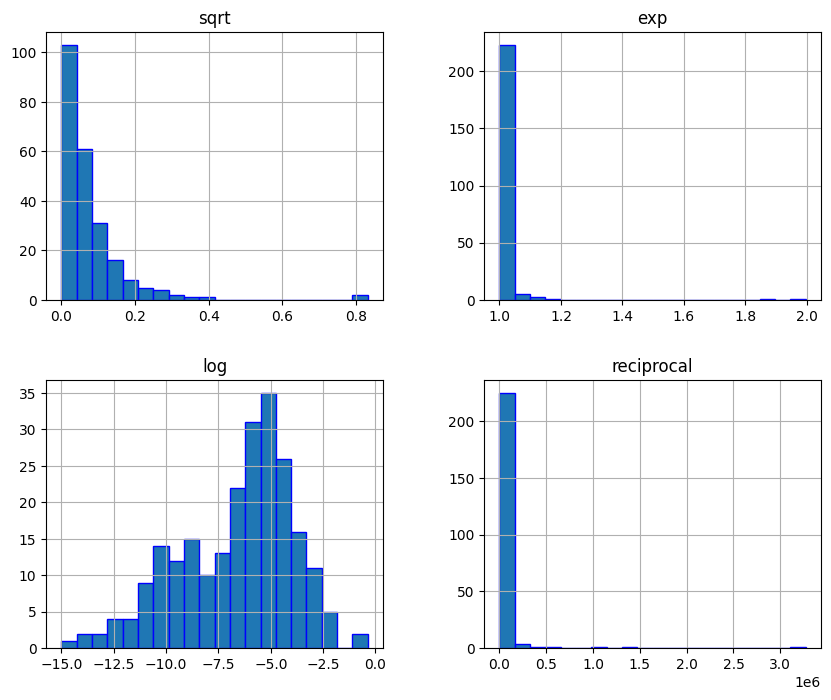

In [ ]:
transformaciones = datos2['2010 Population'].transform([np.sqrt,np.exp,np.log,np.reciprocal])
transformaciones.hist(bins=20,layout=(2,2),edgecolor='b',figsize=(10,8))
plt.show()

El metodo box cox es posible utilizarlo porque solo hay datos positivos y tambien tiene una busna normalziación

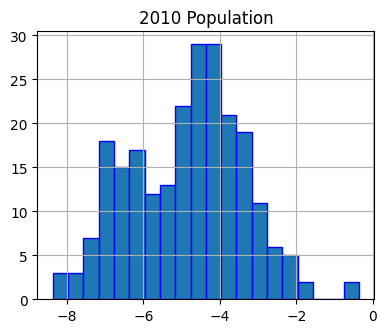

In [ ]:
boxcoxdata,lambdas = sts.boxcox(datos2['2010 Population'])
datosbox = pd.DataFrame(boxcoxdata, columns=["2010 Population"])
datosbox.hist(bins=20,layout=(2,2),edgecolor='b',figsize=(10,8))
plt.show()

El metodos yeo johnson no hace una buena normalizacion en estos datos

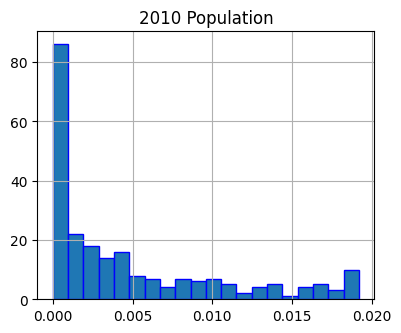

In [ ]:
yeodata,lambday = sts.yeojohnson(datos2['2010 Population'])
datosyeo = pd.DataFrame(yeodata, columns=["2010 Population"])
datosyeo.hist(bins=20,layout=(2,2),edgecolor='b',figsize=(10,8))
plt.show()

## Selección / extracción

A continuacion visualizamos la correlacion para las 3 categorias dentro del dataframe de entrenamiento **Growth Rate**, **World Population Percentage**, **Density (per km²)**.

In [ ]:
train_df[['Growth Rate', 'World Population Percentage', 'Density (per km²)']].corr()

,Growth Rate,World Population Percentage,Density (per km²)
Growth Rate,1.000000,-0.030498,-0.087907
World Population Percentage,-0.030498,1.000000,-0.032091
Density (per km²),-0.087907,-0.032091,1.000000


Utilizamos la indentificacion en la correlacion de las variables para identificar las variables de interes del modelo en cuestion, es decir cuando nos encontramos con variables altamente correlacionadas, propablemente no es necesario utilizar cada una de ellas. Es por este motivo la importancia de utilizar métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento.

### Análisis de componentes principales (PCA)

Nosotros elegimos PCA para nuestro metodo de filtrado para la selección de características de interes para nuestro modelo. A continuación realizaremos una reduccion dimensional utilizando PCA, para el cual solo utilizaremos las tres caracteristicas utilizadas para nuestra correlación anteriormente. Es decir generaremos dos nuevas matrices, una para **entrenamiento** y otra para **prueba**:

In [ ]:
#Entrenamiento
x_train_3 = train_df[['Growth Rate', 'World Population Percentage', 'Density (per km²)']].to_numpy()

x_train_3.shape

(180, 3)

In [ ]:
#Prueba
x_test_3 = test_df[['Growth Rate', 'World Population Percentage', 'Density (per km²)']].to_numpy()

x_test_3.shape

(54, 3)

Obtendremos el error para el modelo de regresion de **bosque aleatorio**. Aun cuando el error continua siendo 0 debido al tipo de datos con el cual estamos trabajando actualmente por la falta de datos reales, vemos una mejora comparado con el error obtenido al principio con el **modelo baseline** con un error promedio absoluto de 0.01

In [ ]:
forest_base = RandomForestRegressor(n_estimators=50, max_depth=5).fit(x_train_3, y_train)
forest_base_test_predictions = forest_base.predict(x_test_3)
mean_absolute_error(y_test, forest_base_test_predictions)

0.0016579943687017565

Ahora procedemos a entrenar PCA lo cual es basicamente una tecnica de reduccion dimensional con 2 caracteristicas de salida para este ejemplo. Es decir, entregamos las 3 caracteristicas incluidas en la matriz generada anteriormente y deseamos solo 2 caracteristicas de salida, obteniendo asi una informacion mas concisa:

In [ ]:
#Entrenamiento de PCA estableciendo 2 caracteristicas de salida
pca = PCA(n_components=2)
pca = pca.fit(x_train_3)

pca

PCA(n_components=2)

Para este ejemplo utilizamos PCA para transformar nuestra matriz de 3 caracteristicas para prueba y entrenamiento en matrices de solo 2 caracteristicas:

In [ ]:
#Comprobamos la transformacion
x_train_pca = pca.transform(x_train_3)
x_test_pca = pca.transform(x_test_3)

x_train_pca.shape, x_test_pca.shape

((180, 2), (54, 2))

Volvemos a generar el error para el modelo de regresion de **bosque aleatorio** pero esta vez utilizaremos las matrices transformadas despues de aplicar PCA, buscando asi mejorar el modelo mediante la reduccion dimensional:

In [ ]:
forest_pca = RandomForestRegressor(n_estimators=50, max_depth=5).fit(x_train_pca, y_train)
forest_pca_test_predictions = forest_pca.predict(x_test_pca)

mean_absolute_error(y_test, forest_pca_test_predictions)

0.0113034877828071

# Avance 3

###Extracción de las caracteristicas más importantes

En el punto anterior, realizamos la reducción usando solo tres características, sin embargo, en este momento la realizaremos con todas las variables numéricas para ver que se puede estar quedando por fuera.  

In [ ]:
x_train_4 = pd.DataFrame(train_df[['2022 Population', '2020 Population', '2015 Population', '2010 Population',
                      '2000 Population', '1990 Population', '1980 Population', '1970 Population',
                      'Area (km²)', 'Density (per km²)', 'World Population Percentage']])
x_train_4.head()

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),World Population Percentage
0,405272,394921,359871,322106,240406,182589,145133,120905,22966,17.6466,0.01
1,2093599,2111072,2107962,2093828,2037936,2044174,1907023,1656783,25713,81.4218,0.03
2,6781953,6979175,7309253,7592273,8097691,8767778,8980606,8582950,110879,61.1654,0.09
3,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,1.23
4,11228821,10999664,10405832,9775755,8540791,7129004,5755800,4475871,48671,230.7087,0.14


In [ ]:
#Prueba
x_test_4 = pd.DataFrame(test_df[['2022 Population', '2020 Population', '2015 Population', '2010 Population',
                      '2000 Population', '1990 Population', '1980 Population', '1970 Population',
                      'Area (km²)', 'Density (per km²)', 'World Population Percentage']])
x_test_4.head()

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),World Population Percentage
0,289950,286403,283032,261426,221537,177264,148599,110982,18575,15.6097,0.00
1,7221365,7358005,7519496,7653748,7935022,7987529,7777010,7193533,88361,81.7257,0.09
2,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,0.25
3,103948,104632,106482,109308,113813,112487,107480,98459,389,267.2185,0.00
4,627082,629048,633966,631044,633324,621442,589324,530268,13812,45.4012,0.01


In [ ]:
pca2 = PCA()

#ajustamos la escala ya que hay mucha diferencia entre algunos datos.
pca2.fit(preprocessing.scale(x_train_4))

pca2Summary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca2.explained_variance_),
                             'Proportion of variance': pca2.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pca2.explained_variance_ratio_)
                             })
pca2Summary_df = pca2Summary_df.transpose()
pca2Summary_df

,0,1,2,3,4,5,6,7,8,9,10
Standard deviation,3.038674,1.007515,0.870427,0.232759,0.028709,0.011935,0.004875,2.740950e-03,2.276177e-03,1.081117e-03,8.122059e-04
Proportion of variance,0.834750,0.091768,0.068494,0.004898,0.000075,0.000013,0.000002,6.791879e-07,4.683818e-07,1.056656e-07,5.963759e-08
Cumulative proportion,0.834750,0.926517,0.995011,0.999909,0.999984,0.999997,0.999999,9.999994e-01,9.999998e-01,9.999999e-01,1.000000e+00


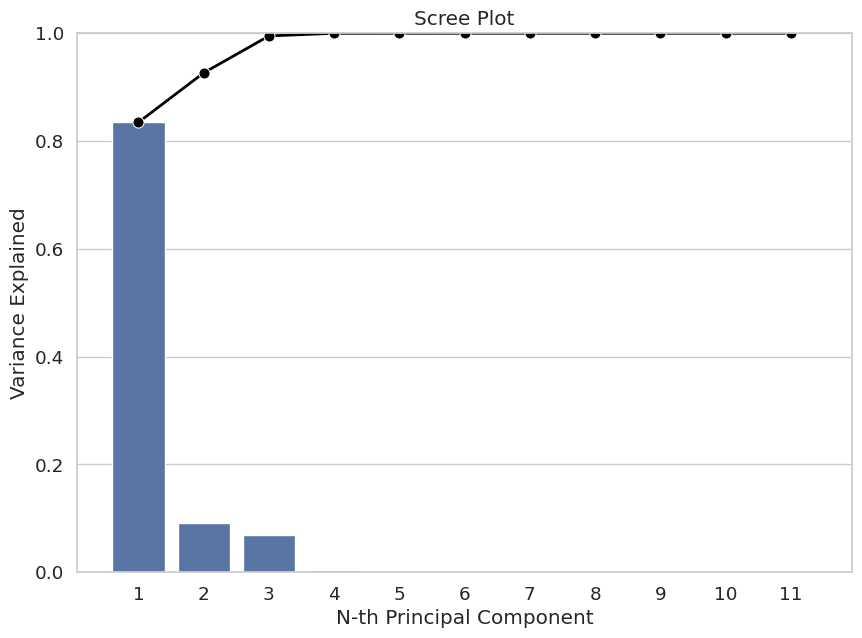

In [ ]:
#en el siguiente código realizamos la gráfica de la varianza para evaluar cuales son las que más aportan
#de igual manera ya se vió en la tabla anterior, pero para visualizarlo mejor.

PC_components = np.arange(pca2.n_components_) + 1

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components,
                y = pca2.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pca2.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
pca2Summary_df.iloc[1][0]+pca2Summary_df.iloc[1][1]+pca2Summary_df.iloc[1][2]

0.9950113421919983

Podemos ver que en el espacio PCA, la varianza se maximiza a lo largo de los 3 primeros componentes y explican el 99% de la varianza

In [ ]:
pca2Summary_df.columns = ['PC{}'.format(i) for i in range(1, len(pca2Summary_df.columns) + 1)]
pca2Summary_df.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,3.04,1.01,0.87,0.23,0.03,0.01,0.0,0.0,0.0,0.0,0.0
Proportion of variance,0.83,0.09,0.07,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Cumulative proportion,0.83,0.93,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0


In [ ]:
pca2Components_df = pd.DataFrame(pca2.components_.transpose(),
                                columns = pca2Summary_df.columns,
                                index = x_train_4.columns
                                )
pca2Components_df.iloc[:,:3]

,PC1,PC2,PC3
2022 Population,0.328077,0.019222,-0.082789
2020 Population,0.328338,0.019211,-0.080712
2015 Population,0.328802,0.019092,-0.076268
2010 Population,0.329137,0.018640,-0.071040
2000 Population,0.329537,0.016338,-0.053479
1990 Population,0.329025,0.013051,-0.032769
1980 Population,0.328196,0.009733,-0.013761
1970 Population,0.327093,0.006361,0.005944
Area (km²),0.169614,-0.199360,0.960618
Density (per km²),-0.012738,0.978705,0.204783


Ahora vamos a realizar nuevamente el random forest pero incluyendo las variables que ya vimos anteriormente eran las que más aportaban.

In [ ]:
x_train_4f = train_df[['2022 Population', '2020 Population', '2015 Population', '2010 Population',
                      '2000 Population', '1990 Population', '1980 Population', '1970 Population',
                      'Area (km²)', 'World Population Percentage']].to_numpy()

x_test_4f = test_df[['2022 Population', '2020 Population', '2015 Population', '2010 Population',
                      '2000 Population', '1990 Population', '1980 Population', '1970 Population',
                      'Area (km²)', 'World Population Percentage']].to_numpy()


In [ ]:
#Entrenamiento de PCA estableciendo 4 caracteristicas de salida
pca3 = PCA(n_components=3).fit(preprocessing.scale(x_train_4f))

pca3

PCA(n_components=3)

In [ ]:
forest_pca3 = RandomForestRegressor(n_estimators=50, max_depth=5).fit(preprocessing.scale(x_train_4f), y_train)
forest_pca3_test_predictions = forest_pca3.predict(x_test_4f)

A continuación vamos a evaluar las métricas del modelo random forest

In [ ]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, forest_pca3_test_predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, forest_pca3_test_predictions)

# R-squared scores
r2 = r2_score(y_test, forest_pca3_test_predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 6))
print('Mean Squared Error:', round(mse, 6))
print('R-squared scores:', round(r2, 6))

Mean Absolute Error: 0.011886
Mean Squared Error: 0.000329
R-squared scores: -0.061793


##Preguntas

**¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?**

En este caso utilizamos Regresión linear.

**¿Se puede determinar la importancia de las características para el modelo generado?**

En este caso ejemplo, vemos la importancia de usar PCA ya que así podemos generar estas características que involucran las demás características como el histórico. Se observa que corriendo el modelo random forest con PCA, se disminuye el error de

**¿El modelo está sub/sobreajustando los datos de entrenamiento?**



**¿Cuál es la métrica adecuada para este problema de negocio?**

**¿Cuál debería ser el desempeño mínimo a obtener?**